# Problema 3 

Problema de claisficacion. 

In [32]:
from scipy import stats
import numpy as np
import pandas as pd 
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Cargamos los datos y los graficamos para ver su comportamiento y como se relacionan esto para escoger un metodo de separacion.

In [17]:
data = pd.read_csv('problem3.csv')
data

,x_age,x_cholesterol,x_sugar,x_Tcell,y
0,35,220,80,550,0
1,18,240,120,600,0
2,22,260,55,580,0
3,23,220,75,575,0
4,28,180,100,620,0
5,38,280,74,674,0
6,40,235,175,275,1
7,25,200,180,180,1
8,35,150,240,140,1
9,34,280,130,80,1


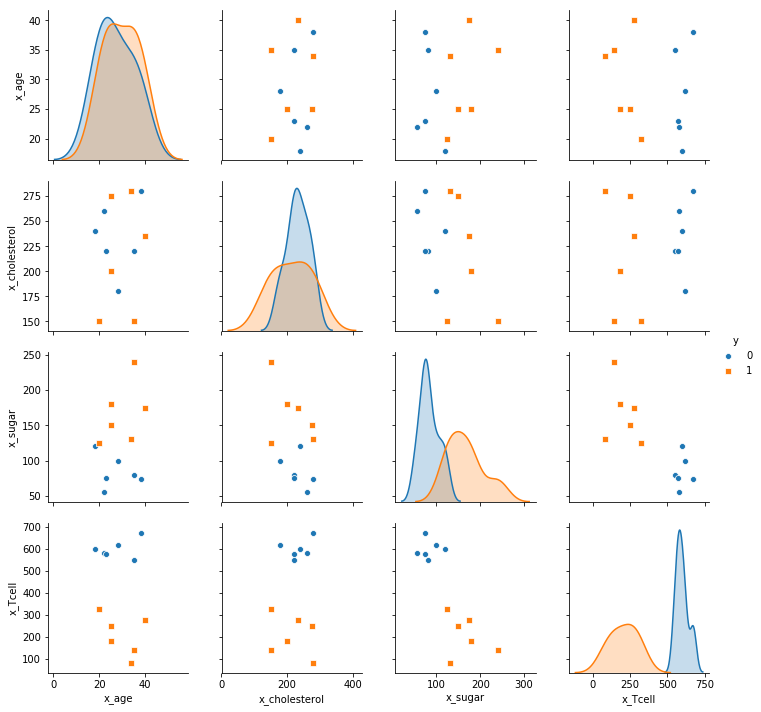

In [18]:
sns.pairplot(data, hue='y',markers=["o", "s"] ,vars= ['x_age' ,'x_cholesterol','x_sugar','x_Tcell'])
plt.show()

Por el comportamiento de los datos dado que son pocos y se puede ver la relacion la cual ademas es binaria usaremos un metodo logistico.
Definimos el modelo.

In [19]:
model = LogisticRegression(C=1.0, solver='lbfgs', multi_class='ovr')
model1 = LogisticRegression(C=1.0, solver='lbfgs', multi_class='ovr')
X_Tcell= np.array([data.x_Tcell]).reshape(-1, 1) 
Y = np.array(data.y)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X_Tcell, Y, test_size=0.3, random_state=5)

In [21]:
model.fit(x_train, y_train)
model.score(x_train, y_train)


1.0

#### Probamos para Tcell 

Text(0, 0.5, 'Tcell')

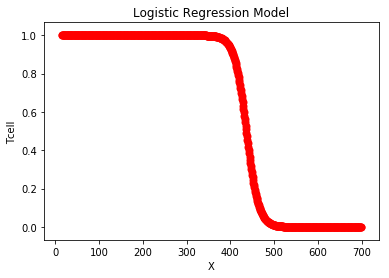

In [22]:
X = np.arange(15, 700, 1)
X = X.reshape(-1, 1)
plt.scatter(X_Tcell, Y)
plt.scatter(X, model.predict_proba(X)[:,1],marker='o',color='r',linewidth=2)
plt.title("Logistic Regression Model")
plt.xlabel('X')
plt.ylabel('Tcell')

### Probamos para Azucar

In [23]:
X_Sugar= np.array([data.x_sugar]).reshape(-1, 1) 


In [24]:
x_train, x_test, y_train, y_test = train_test_split(X_Sugar, Y, test_size=0.3, random_state=5)

In [25]:
model1.fit(x_train, y_train)
model1.score(x_train, y_train)

1.0

Text(0, 0.5, 'Sugar')

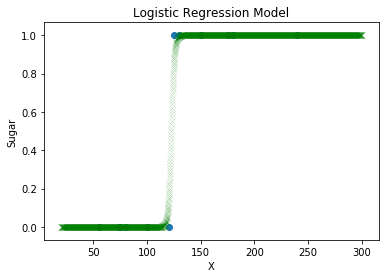

In [26]:
S = np.arange(20, 300, 0.1)
S = S.reshape(-1, 1)
plt.scatter(X_Sugar, Y)
plt.scatter(S,model1.predict_proba(S)[:,1],marker='x',color='g',linewidth=.1)
plt.title("Logistic Regression Model")
plt.xlabel('X')
plt.ylabel('Sugar')

### Probamos para Age

In [27]:
X_age= np.array([data.x_age]).reshape(-1, 1) 

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X_age, Y, test_size=0.3, random_state=5)

In [29]:
model1.fit(x_train, y_train)
model1.score(x_train, y_train)

0.5

Text(0, 0.5, 'Age')

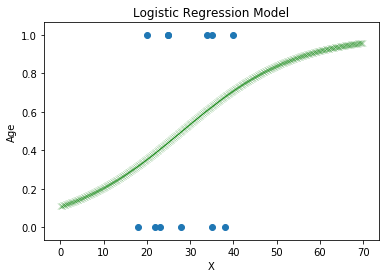

In [30]:
A = np.arange(0, 70, 0.1)
A = A.reshape(-1, 1)
plt.scatter(X_age, Y)
plt.scatter(A,model1.predict_proba(A)[:,1],marker='x',color='g',linewidth=.1)
plt.title("Logistic Regression Model")
plt.xlabel('X')
plt.ylabel('Age')

Con los datos anteriores podemos decir  que los mejores predictores son niveles de azucar y T_cell.

In [38]:
ns_probs = [0 for _ in range(len(Y))]
lr_probs = model.predict_proba(X_Tcell)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(Y, ns_probs)
lr_auc = roc_auc_score(Y, lr_probs)

In [39]:
print('ROC AUC for Logistic Model =%.3f' % (lr_auc))

ROC AUC for Logistic Model =1.000


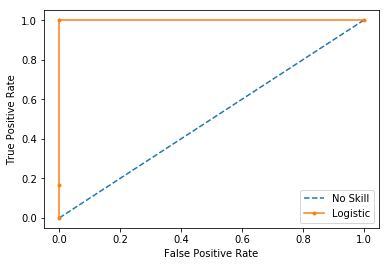

In [40]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()